In [35]:
import numpy as np
import pandas as pd
import math   as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [36]:
def Vsualize(column_name,data):
    
    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index
    
    color = sns.color_palette('RdBu')
    plt.figure(figsize=(7,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
    
    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.tight_layout()
    plt.show()


In [37]:
def train_test_model(model,x_train,x_test,y_train,y_test):
    # Train model 
    model.fit(x_train,y_train) 
    
    # Test model
    y_predict = model.predict(x_test)

    #Evaluate Model
    print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
    print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
    print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
    print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
    
    # Scatter plot for real and predict data
    plt.scatter(y_test,y_predict)
    return model


In [38]:
data = pd.read_csv('Downloads/Advertising (1).csv')

In [39]:
data.shape

(200, 5)

In [40]:
data.sample

<bound method NDFrame.sample of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [41]:
data.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
106,107,25.0,11.0,29.7,7.2
191,192,75.5,10.8,6.0,9.9
32,33,97.2,1.5,30.0,9.6
99,100,135.2,41.7,45.9,17.2
65,66,69.0,9.3,0.9,9.3
6,7,57.5,32.8,23.5,11.8
13,14,97.5,7.6,7.2,9.7
70,71,199.1,30.6,38.7,18.3
27,28,240.1,16.7,22.9,15.9
74,75,213.4,24.6,13.1,17.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [44]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [45]:
data.duplicated().sum()

np.int64(0)

In [46]:
data.shape

(200, 5)

In [47]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [48]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

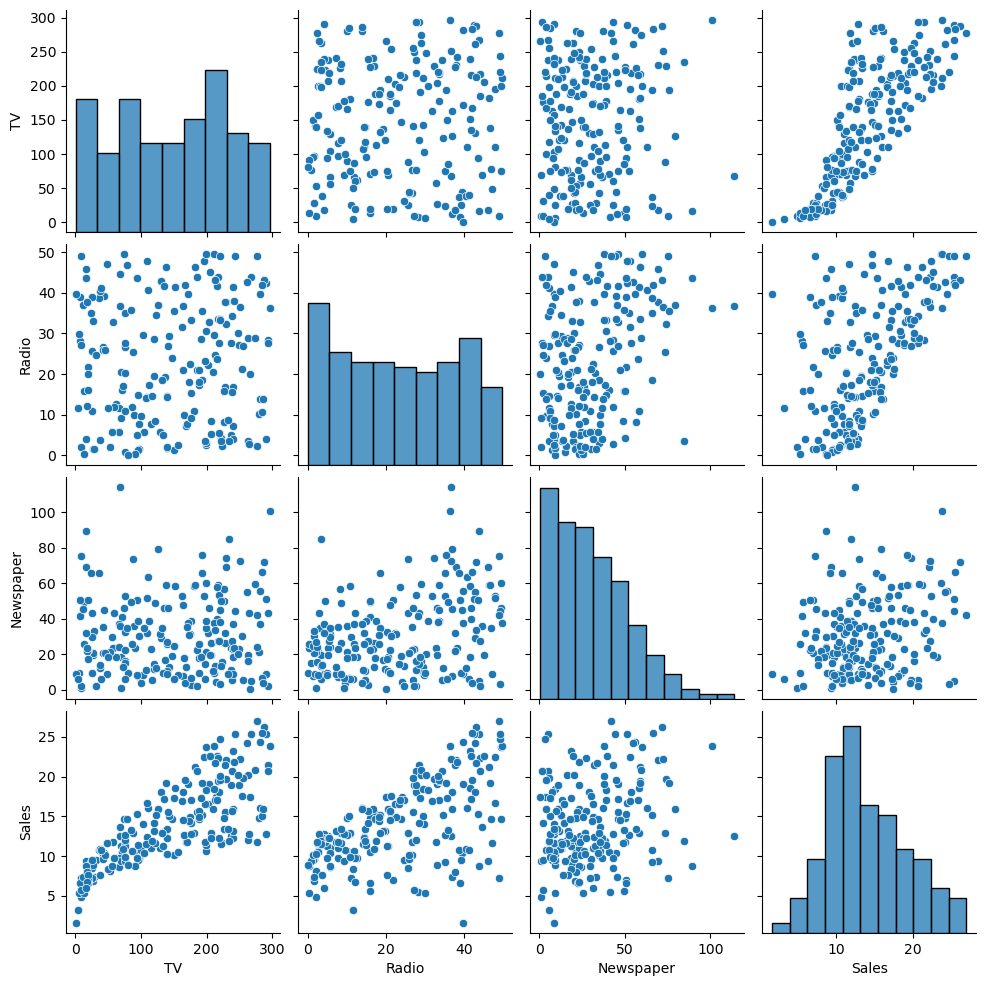

In [49]:
sns.pairplot(data)

In [50]:
correlation = data.corr()

In [51]:
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


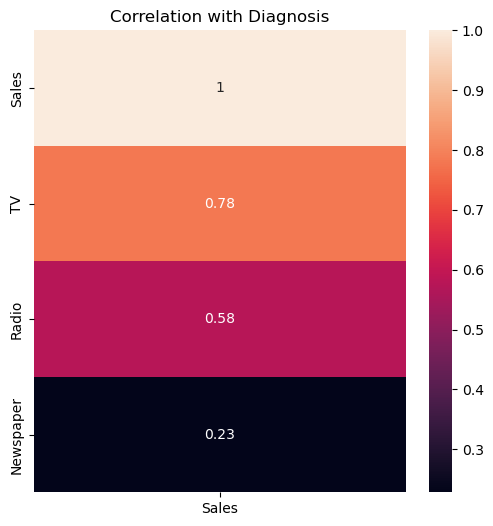

In [52]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation[['Sales']].sort_values(by='Sales', ascending=False), annot=True)
plt.title("Correlation with Diagnosis")
plt.show()

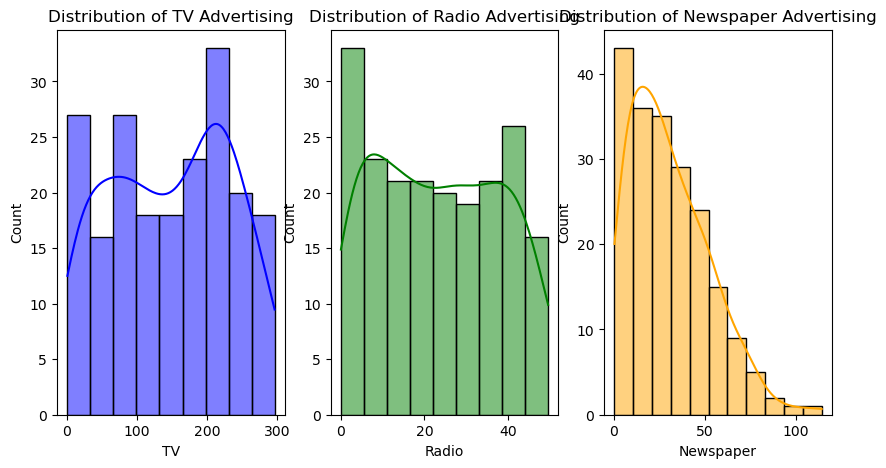

In [53]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['TV'], kde=True, color='blue')
plt.title('Distribution of TV Advertising')

plt.subplot(1, 3, 2)
sns.histplot(data['Radio'], kde=True, color='green')
plt.title('Distribution of Radio Advertising')

plt.subplot(1, 3, 3)
sns.histplot(data['Newspaper'], kde=True, color='orange')
plt.title('Distribution of Newspaper Advertising')

plt.show()

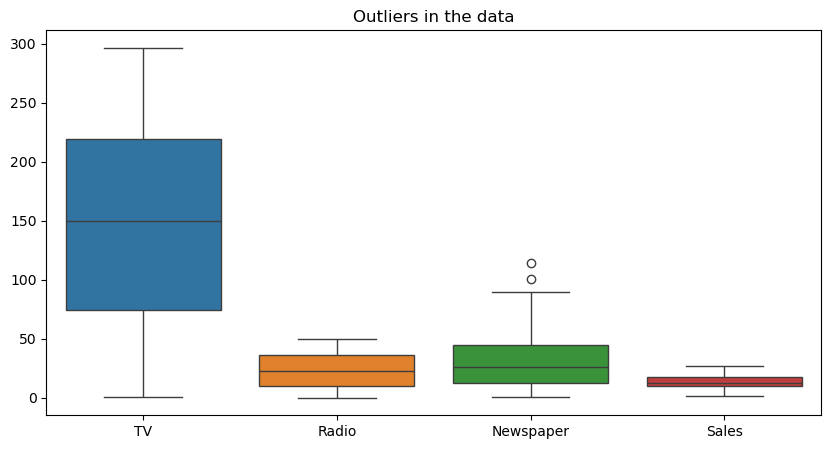

In [54]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.title("Outliers in the data")
plt.show()

In [56]:
x =data.drop('Sales',axis = 1)
y = data['Sales']

In [58]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=45)

R2 Score =  89.56%
Mean Absolute Error =  1.0788802763848653
Mean Squared Error =  2.256494247280933
Root Mean Squared Error =  1.5021631892976652


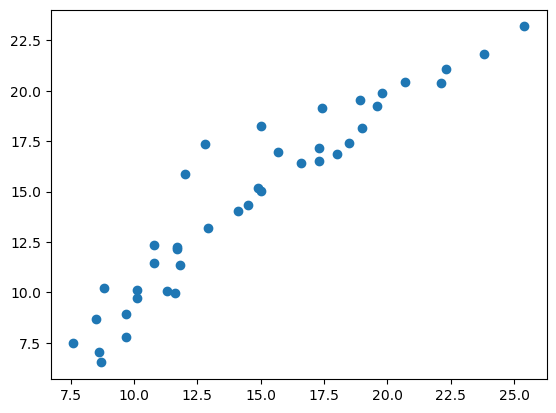

In [60]:
LR = train_test_model(LinearRegression(),x_train,x_test,y_train,y_test)

In [61]:
# the coefficients
LR.coef_
# The coefficients in a dataframe
cdata = pd.DataFrame(LR.coef_,x.columns,columns=['Coef'])
cdata.reset_index()

,index,Coef
0,TV,13.896014
1,Radio,9.099685
2,Newspaper,-0.553100


R2 Score =  94.69%
Mean Absolute Error =  0.8175000000000001
Mean Squared Error =  1.1472500000000003
Root Mean Squared Error =  1.071097567918068


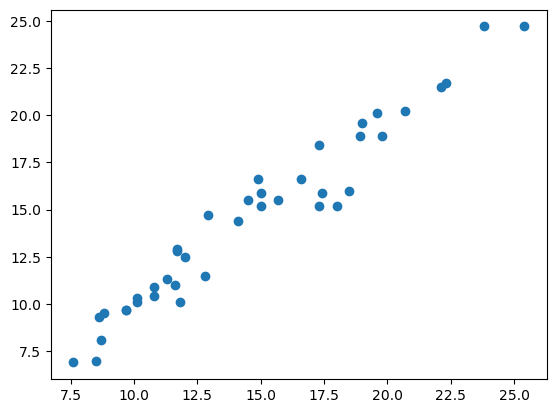

In [62]:
DR = train_test_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

In [63]:
importances = DR.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.643136
1,Radio,0.354156
2,Newspaper,0.002707


R2 Score =  97.73%
Mean Absolute Error =  0.5506749999999987
Mean Squared Error =  0.49022957499999686
Root Mean Squared Error =  0.700163962940108


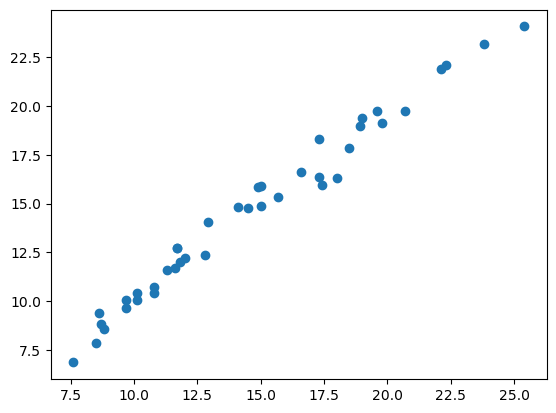

In [64]:
RF = train_test_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

In [65]:
importances = RF.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.648175
1,Radio,0.340433
2,Newspaper,0.011391
